In [1]:
import pandas as pd
import numpy as np
from keras import models, layers, regularizers
from matplotlib import pyplot as plt
import seaborn as sn

Using TensorFlow backend.


In [2]:
data = pd.read_csv("compresive_strength_concrete.csv")
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
data.shape

(1030, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


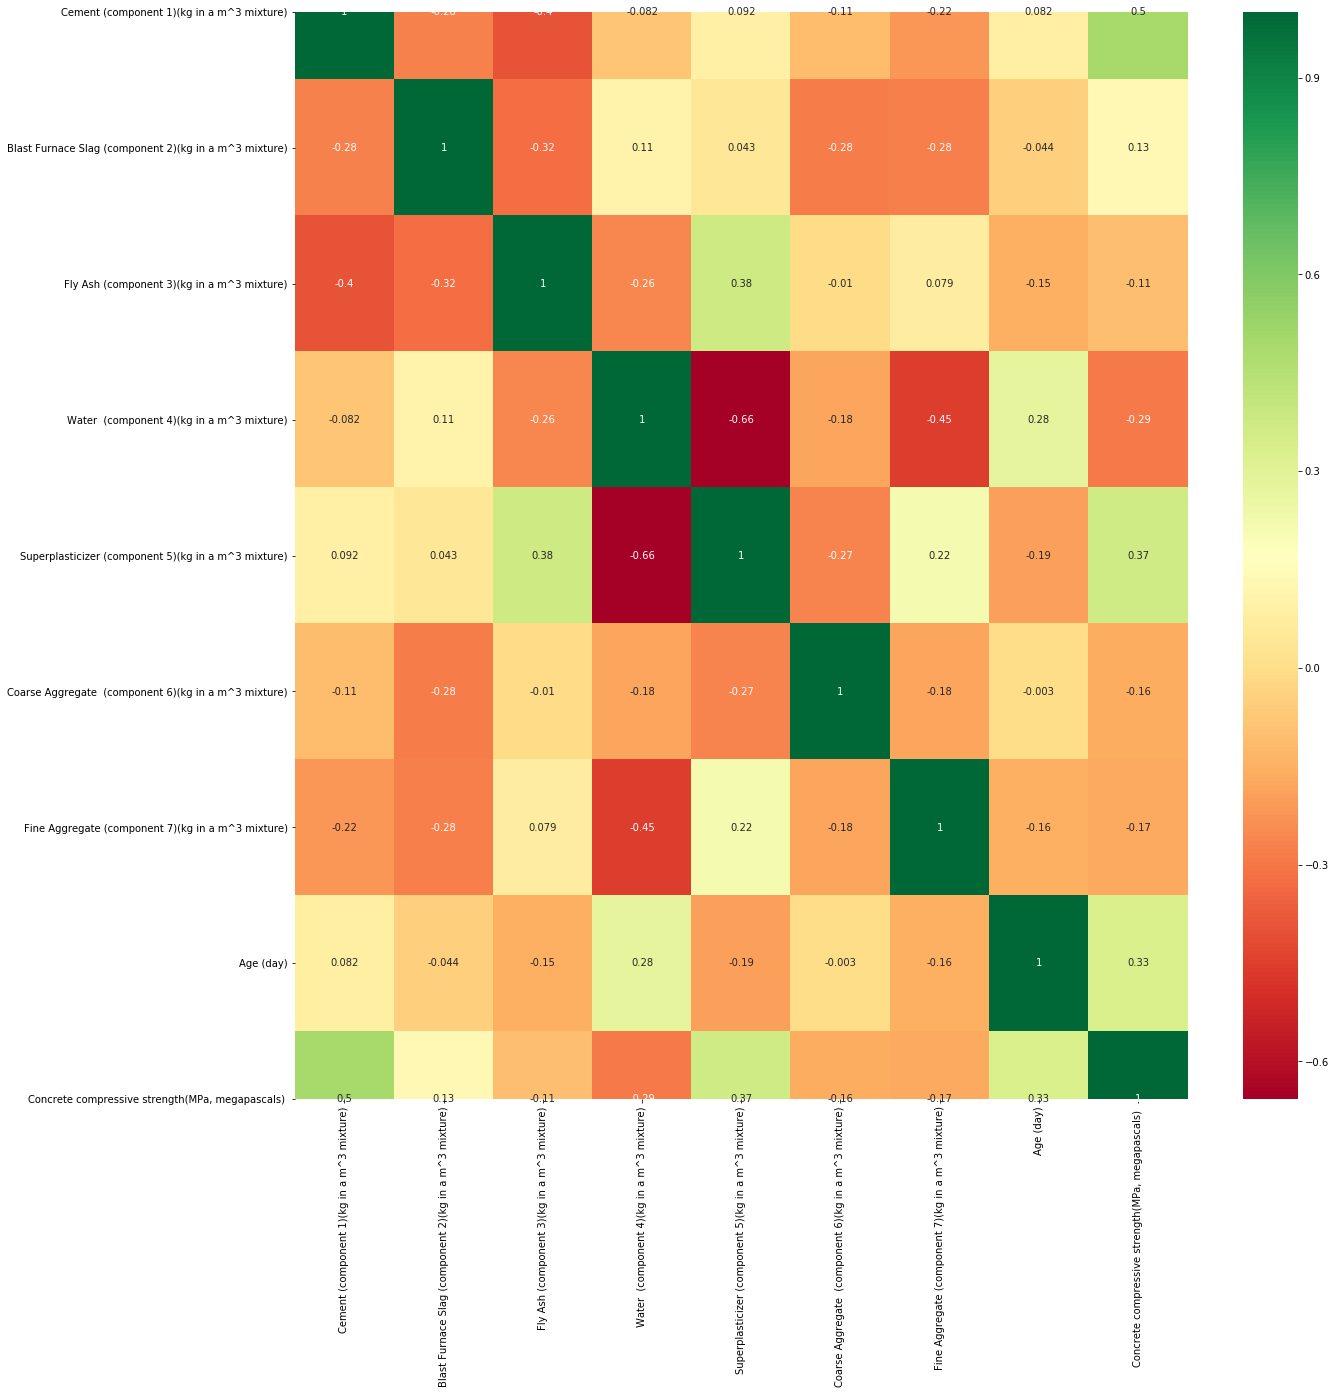

In [6]:
corrmat = data.corr()
top_features = corrmat.index
plt.figure(figsize=(20,20))
features = sn.heatmap(data[top_features].corr(), annot=True,cmap = "RdYlGn") 

In [11]:
# Renaming the column names
data = data.rename(columns={"Cement (component 1)(kg in a m^3 mixture)":"cement",
                            "Blast Furnace Slag (component 2)(kg in a m^3 mixture)":"blast_furnace_slag",
                           "Fly Ash (component 3)(kg in a m^3 mixture)":"fly_ash",
                            "Water  (component 4)(kg in a m^3 mixture)":"water",
                           "Superplasticizer (component 5)(kg in a m^3 mixture)":"superplasticizer",
                            "Coarse Aggregate  (component 6)(kg in a m^3 mixture)":"coarse_aggregate",
                           "Fine Aggregate (component 7)(kg in a m^3 mixture)":"fine_aggregate",
                            "Age (day)":"age",
                            "Concrete compressive strength(MPa, megapascals) ":"concrete_compressive_aggregate"})
data

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_aggregate
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [12]:
y = data["concrete_compressive_aggregate"]
data.drop("concrete_compressive_aggregate",axis = 1, inplace=True)
X_train = data[:515]
Y_train = y[:515]
X_test = data[515:824]
Y_test = y[515:824]
X_val = data[824:]
Y_val = y[824:]

In [13]:
data_mean = X_train.mean(axis=0)
X_train -= data_mean   
data_std = X_train.std(axis=0)
X_train /= data_std
X_val -= data_mean
X_val /= data_std
X_test -= data_mean
X_test/= data_std

In [20]:
X_test.isnull().sum()

cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_aggregate      0
fine_aggregate        0
age                   0
dtype: int64

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', kernel_regularizer =regularizers.l2(0.02), input_shape=(X_train.shape[1],)))
model.add(layers.Dense(14, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
model.add(layers.Dense(6, activation='relu', kernel_regularizer =regularizers.l2(0.002)))
# network.add(layers.Dense(4, activation='relu', kernel_regularizer =regularizers.l2(0.002)))
model.add(layers.Dense(1))

In [22]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [23]:
history = model.fit(X_train,Y_train,epochs=100)
history

Epoch 1/100
515/515 [==============================] - 0s 726us/step - loss: 2034.6767 - mae: 41.8327
Epoch 2/100
515/515 [==============================] - 0s 58us/step - loss: 2003.3717 - mae: 41.4517
Epoch 3/100
515/515 [==============================] - 0s 54us/step - loss: 1963.5286 - mae: 40.9621
Epoch 4/100
515/515 [==============================] - 0s 64us/step - loss: 1908.8860 - mae: 40.2957
Epoch 5/100
515/515 [==============================] - 0s 52us/step - loss: 1843.2448 - mae: 39.4723
Epoch 6/100
515/515 [==============================] - 0s 52us/step - loss: 1763.8931 - mae: 38.4726
Epoch 7/100
515/515 [==============================] - 0s 64us/step - loss: 1667.9766 - mae: 37.2211
Epoch 8/100
515/515 [==============================] - 0s 66us/step - loss: 1553.4157 - mae: 35.6947
Epoch 9/100
515/515 [==============================] - 0s 74us/step - loss: 1424.6084 - mae: 33.9038
Epoch 10/100
515/515 [==============================] - 0s 70us/step - loss: 1285.9656 - m

515/515 [==============================] - 0s 52us/step - loss: 133.5204 - mae: 9.4212
Epoch 83/100
515/515 [==============================] - 0s 54us/step - loss: 132.7674 - mae: 9.3952
Epoch 84/100
515/515 [==============================] - 0s 52us/step - loss: 131.9932 - mae: 9.3994
Epoch 85/100
515/515 [==============================] - 0s 50us/step - loss: 131.8854 - mae: 9.4144
Epoch 86/100
515/515 [==============================] - 0s 56us/step - loss: 130.2980 - mae: 9.3047
Epoch 87/100
515/515 [==============================] - 0s 46us/step - loss: 130.6905 - mae: 9.4076
Epoch 88/100
515/515 [==============================] - 0s 52us/step - loss: 129.9242 - mae: 9.3189
Epoch 89/100
515/515 [==============================] - 0s 50us/step - loss: 129.4883 - mae: 9.2141
Epoch 90/100
515/515 [==============================] - 0s 50us/step - loss: 128.6394 - mae: 9.2018
Epoch 91/100
515/515 [==============================] - 0s 48us/step - loss: 128.3236 - mae: 9.2354
Epoch 92/100


In [24]:
k = 4
num_val_samples = len(X_train) // k
num_epochs = 100
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = Y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([X_train[:i * num_val_samples],X_train[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([Y_train[:i * num_val_samples],Y_train[(i + 1) * num_val_samples:]],axis=0)
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', kernel_regularizer =regularizers.l2(0.02), input_shape=(X_train.shape[1],)))
model.add(layers.Dense(14, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
model.add(layers.Dense(6, activation='relu', kernel_regularizer =regularizers.l2(0.002)))
# network.add(layers.Dense(4, activation='relu', kernel_regularizer =regularizers.l2(0.002)))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(partial_train_data, partial_train_targets,
validation_data=(X_val, Y_val),epochs=num_epochs, batch_size=1, verbose=0)
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)
history.history

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


{'val_loss': [345.68207460555055,
  121.38151934366782,
  131.6385647058487,
  153.14023683198448,
  148.22278107601463,
  185.16209562021552,
  195.3066461219371,
  181.12615613451283,
  201.17642847137543,
  207.71487047313485,
  168.9789928611621,
  192.64512437524147,
  194.79601717197778,
  202.64748738257632,
  184.75704842429715,
  187.6350566076422,
  185.49335910336484,
  167.3671720583462,
  174.8729006367401,
  170.7281424695427,
  166.49989080689485,
  152.5806265736668,
  148.68969529925042,
  154.1209179984713,
  140.49049934079346,
  138.78293187872876,
  141.12533581198997,
  133.9886072839348,
  123.2882183419848,
  127.35998964599035,
  113.85677763038468,
  117.13504183871075,
  129.68453300577923,
  120.49082543028211,
  116.47342796985386,
  113.99340207947111,
  120.2252448548391,
  110.0190396222096,
  124.39912275955515,
  121.1324093480712,
  129.92848930196854,
  123.37321048801385,
  131.91459360979135,
  137.94839799809225,
  114.6601205907979,
  137.9292202

In [25]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

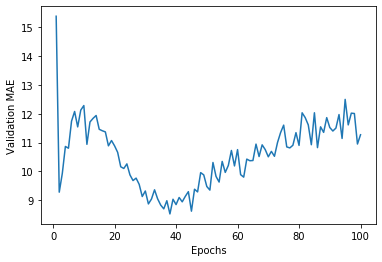

In [26]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

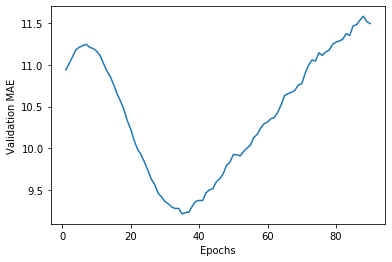

In [27]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [28]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', kernel_regularizer =regularizers.l2(0.02), input_shape=(X_train.shape[1],)))
model.add(layers.Dense(14, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
model.add(layers.Dense(6, activation='relu', kernel_regularizer =regularizers.l2(0.002)))
# network.add(layers.Dense(4, activation='relu', kernel_regularizer =regularizers.l2(0.002)))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.fit(X_train, Y_train,epochs=35, batch_size=16, verbose=0)

In [29]:
y_pred = model.predict(X_test)
y_pred

array([[29.438322],
       [27.513311],
       [27.821312],
       [31.594334],
       [34.188175],
       [31.799786],
       [32.18011 ],
       [36.865593],
       [41.01265 ],
       [41.01265 ],
       [38.16552 ],
       [38.16552 ],
       [38.430298],
       [38.430298],
       [44.52033 ],
       [44.52033 ],
       [38.613434],
       [34.680668],
       [27.302649],
       [30.464075],
       [36.99592 ],
       [32.341038],
       [42.75473 ],
       [41.84082 ],
       [45.452953],
       [41.66674 ],
       [27.722239],
       [35.271923],
       [28.503143],
       [27.6169  ],
       [30.043406],
       [29.693615],
       [28.03649 ],
       [29.266714],
       [35.059746],
       [30.764387],
       [28.217169],
       [38.848198],
       [57.448067],
       [33.09267 ],
       [45.843006],
       [48.47316 ],
       [35.455116],
       [37.8421  ],
       [59.07173 ],
       [32.58015 ],
       [34.750656],
       [32.232407],
       [50.81511 ],
       [40.529602],


In [30]:
test_mse_score, test_mae_score  =model.evaluate(X_train, Y_train)

515/515 [==============================] - 0s 141us/step


In [31]:
test_mae_score

10.218932151794434

In [32]:
test_mse_score

153.94343996510923